<a href="https://colab.research.google.com/github/chin2yere/FDSfE_COffor/blob/main/HW3/assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats

IDEA
Citibike usage would be different by gender if the bikes are more comfrotable for people who are taller and with larger frames.

NULL HYPOTHESIS H0
Citibike usage would **be the same** by gender if the bikes are more comfortable for people who are taller with larger frames.

ALTERNATIVE HYPOTHESIS HA:
Citibike usage would be different by gender if the bikes are more comfortable for people who are taller with larger frames or

Citibike usage would be different by gender if the bikes are more comfortable for people who are smaller with smaller frames or
 
Citibike usage would be the same by gender if the bikes are more comfortable for people who are smaller with smaller frames.

In [2]:
pvalue = 0.05

In [3]:
datestring = '201905'
cbMay19 = pd.read_csv("https://s3.amazonaws.com/tripdata/"+ datestring + "-citibike-tripdata.csv.zip")
cbMay19

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,139,2019-05-01 00:00:01.9010,2019-05-01 00:02:21.5170,447,8 Ave & W 52 St,40.763707,-73.985162,423,W 54 St & 9 Ave,40.765849,-73.986905,31170,Subscriber,1983,1
1,754,2019-05-01 00:00:03.0210,2019-05-01 00:12:37.6920,3258,W 27 St & 10 Ave,40.750182,-74.002184,3255,8 Ave & W 31 St,40.750585,-73.994685,25560,Customer,1969,0
2,2308,2019-05-01 00:00:04.6270,2019-05-01 00:38:33.1710,3093,N 6 St & Bedford Ave,40.717452,-73.958509,3676,Van Brunt St & Van Dyke St,40.675833,-74.014726,33369,Subscriber,1978,1
3,143,2019-05-01 00:00:19.3340,2019-05-01 00:02:42.5200,3486,Schermerhorn St & Bond St,40.688417,-73.984517,3412,Pacific St & Nevins St,40.685376,-73.983021,32041,Subscriber,1997,1
4,138,2019-05-01 00:00:22.1840,2019-05-01 00:02:40.6480,388,W 26 St & 10 Ave,40.749718,-74.002950,494,W 26 St & 8 Ave,40.747348,-73.997236,35237,Subscriber,1967,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1924558,304,2019-05-31 23:59:45.5760,2019-06-01 00:04:50.4620,3175,W 70 St & Amsterdam Ave,40.777480,-73.982886,423,W 54 St & 9 Ave,40.765849,-73.986905,32285,Subscriber,1987,2
1924559,324,2019-05-31 23:59:46.4650,2019-06-01 00:05:11.1630,2003,1 Ave & E 18 St,40.733812,-73.980544,536,1 Ave & E 30 St,40.741444,-73.975361,33874,Subscriber,1994,2
1924560,1926,2019-05-31 23:59:51.5060,2019-06-01 00:31:58.3920,146,Hudson St & Reade St,40.716250,-74.009106,422,W 59 St & 10 Ave,40.770513,-73.988038,33395,Subscriber,1985,1
1924561,2047,2019-05-31 23:59:52.4170,2019-06-01 00:34:00.1970,3658,W 18 St & 9 Ave,40.743534,-74.003676,2008,Little West St & 1 Pl,40.705693,-74.016777,27624,Subscriber,1987,0


In [4]:
cbMay19["tripduration"].describe()

count    1.924563e+06
mean     1.067189e+03
std      1.254636e+04
min      6.100000e+01
25%      3.790000e+02
50%      6.530000e+02
75%      1.158000e+03
max      2.922656e+06
Name: tripduration, dtype: float64

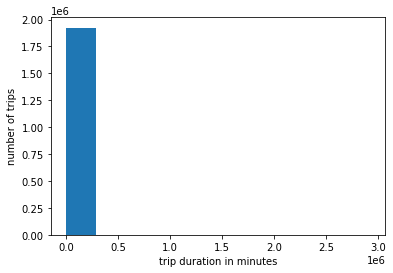

In [5]:
plt.hist(cbMay19["tripduration"]);
plt.xlabel("x")
plt.xlabel("trip duration in minutes");
plt.ylabel("y")
plt.ylabel("number of trips");


the plot above shows a histogram of the trip duration column. it is the number of trips plotted against trip duration in minutes


# <mark>WFF</mark> Figure captions should be more descriptive.

In [6]:
cbMay19_clean = cbMay19[cbMay19["tripduration"]< 1440]
cbMay19_clean

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,139,2019-05-01 00:00:01.9010,2019-05-01 00:02:21.5170,447,8 Ave & W 52 St,40.763707,-73.985162,423,W 54 St & 9 Ave,40.765849,-73.986905,31170,Subscriber,1983,1
1,754,2019-05-01 00:00:03.0210,2019-05-01 00:12:37.6920,3258,W 27 St & 10 Ave,40.750182,-74.002184,3255,8 Ave & W 31 St,40.750585,-73.994685,25560,Customer,1969,0
3,143,2019-05-01 00:00:19.3340,2019-05-01 00:02:42.5200,3486,Schermerhorn St & Bond St,40.688417,-73.984517,3412,Pacific St & Nevins St,40.685376,-73.983021,32041,Subscriber,1997,1
4,138,2019-05-01 00:00:22.1840,2019-05-01 00:02:40.6480,388,W 26 St & 10 Ave,40.749718,-74.002950,494,W 26 St & 8 Ave,40.747348,-73.997236,35237,Subscriber,1967,1
6,514,2019-05-01 00:01:06.0520,2019-05-01 00:09:40.1670,439,E 4 St & 2 Ave,40.726281,-73.989780,336,Sullivan St & Washington Sq,40.730477,-73.999061,15160,Subscriber,1988,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1924555,432,2019-05-31 23:59:41.6790,2019-06-01 00:06:54.2000,382,University Pl & E 14 St,40.734927,-73.992005,507,E 25 St & 2 Ave,40.739126,-73.979738,21562,Subscriber,1995,1
1924556,432,2019-05-31 23:59:42.1250,2019-06-01 00:06:54.9420,358,Christopher St & Greenwich St,40.732916,-74.007114,405,Washington St & Gansevoort St,40.739323,-74.008119,34352,Customer,1985,2
1924558,304,2019-05-31 23:59:45.5760,2019-06-01 00:04:50.4620,3175,W 70 St & Amsterdam Ave,40.777480,-73.982886,423,W 54 St & 9 Ave,40.765849,-73.986905,32285,Subscriber,1987,2
1924559,324,2019-05-31 23:59:46.4650,2019-06-01 00:05:11.1630,2003,1 Ave & E 18 St,40.733812,-73.980544,536,1 Ave & E 30 St,40.741444,-73.975361,33874,Subscriber,1994,2


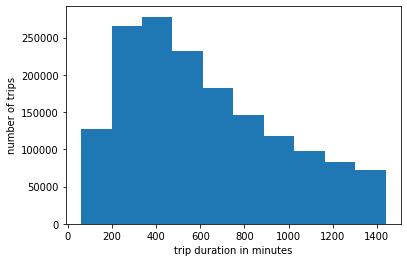

In [7]:
plt.hist(cbMay19_clean["tripduration"]);
plt.xlabel("x")
plt.xlabel("trip duration in minutes");
plt.ylabel("y")
plt.ylabel("number of trips");

the histogram is much clearer, now that the data is clean

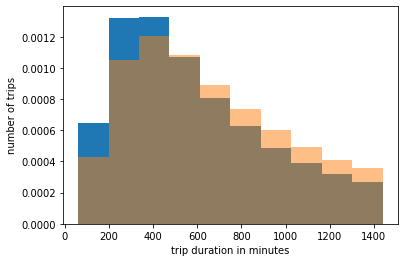

In [8]:
cbMay19_male = cbMay19_clean[cbMay19_clean["gender"]== 1]
cbMay19_female = cbMay19_clean[cbMay19_clean["gender"]== 2]
plt.hist(cbMay19_male["tripduration"], density=1);
plt.hist(cbMay19_female["tripduration"], density=1, alpha=0.5);
plt.xlabel("trip duration in minutes");
plt.ylabel("number of trips");

The male category has a lot more trips than the female category

In [9]:
stats.ks_2samp(cbMay19_male["tripduration"], cbMay19_female["tripduration"])

KstestResult(statistic=0.08422140452629323, pvalue=0.0)

In [10]:
stats.ttest_ind(cbMay19_male["tripduration"], cbMay19_female["tripduration"])

Ttest_indResult(statistic=-100.84403665697793, pvalue=0.0)

From the pvalues above, we can reject the null hypothesis

# <mark>WFF</mark> The t-test and the ks-test have two different null hypothesis. The t-test asks the question "do these two samples have the same mean?" and the ks-test asks the question "do these samples come from the same disitrubiton?". So you must be explicit here

In [11]:
table_2=cbMay19_male.describe()

In [12]:
table_1=cbMay19_female.describe()

In [13]:
(table_1).compare(table_2)

tripduration               start station id                \
                self         other             self         other   
count  376590.000000  1.121342e+06    376590.000000  1.121342e+06   
mean      652.176014  5.882071e+02      1714.834733  1.601038e+03   
std       342.029121  3.350298e+02      1484.795511  1.464205e+03   
min              NaN           NaN              NaN           NaN   
25%       375.000000  3.210000e+02       377.000000  3.790000e+02   
50%       593.000000  5.140000e+02       518.000000  5.040000e+02   
75%       897.000000  8.050000e+02      3314.000000  3.263000e+03   
max              NaN           NaN              NaN           NaN   

      start station latitude               start station longitude  \
                        self         other                    self   
count          376590.000000  1.121342e+06           376590.000000   
mean               40.734134  4.073751e+01              -73.981474   
std                 0.031432  2.899530e-02                0.019727   
min                      NaN           NaN                     NaN   
25%                40.715348  4.071912e+01              -73.995101   
50%                40.733143  4.073913e+01              -73.984517   
75%                40.754601  4.075641e+01              -73.969617   
max                      NaN           NaN                     NaN   

                    end station id               end station latitude  \
              other           self         other                 self   
count  1.121342e+06  376590.000000  1.121342e+06        376590.000000   
mean  -7.398267e+01    1706.519560  1.591726e+03            40.734072   
std    1.904252e-02    1483.650831  1.462975e+03             0.031224   
min             NaN            NaN           NaN                  NaN   
25%   -7.399490e+01     373.000000  3.790000e+02            40.715348   
50%   -7.398602e+01     517.000000  5.030000e+02            40.733320   
75%   -7.397371e+01    3314.000000  3.260000e+03            40.754121   
max             NaN            NaN           NaN                  NaN   

                    end station longitude                       bikeid  \
              other                  self         other           self   
count  1.121342e+06         376590.000000  1.121342e+06  376590.000000   
mean   4.073735e+01            -73.981772 -7.398288e+01   26703.105491   
std    2.882275e-02              0.019796  1.912914e-02    6597.888399   
min             NaN            -74.025353 -7.403346e+01            NaN   
25%    4.071911e+01                   NaN           NaN   19973.000000   
50%    4.073902e+01            -73.985162 -7.398650e+01   28397.500000   
75%    4.075601e+01            -73.970325 -7.397375e+01   32509.000000   
max             NaN                   NaN           NaN   38002.000000   

                        birth year                  gender             
              other           self         other      self      other  
count  1.121342e+06  376590.000000  1.121342e+06  376590.0  1121342.0  
mean   2.738294e+04    1981.404339  1.980387e+03       2.0        1.0  
std    6.284383e+03      11.948733  1.204244e+01       NaN        NaN  
min             NaN    1888.000000  1.885000e+03       2.0        1.0  
25%    2.126600e+04    1973.000000  1.972000e+03       2.0        1.0  
50%    2.900400e+04    1985.000000  1.983000e+03       2.0        1.0  
75%    3.262600e+04    1991.000000  1.990000e+03       2.0        1.0  
max    3.799800e+04            NaN           NaN       2.0        1.0

from the comparison above, we can see that the means are not equal or within one standard deviation from each other


In [14]:
cbMay19_male["tripduration"].mean()

588.2070911461445

In [15]:
cbMay19_female["tripduration"].mean()

652.1760137019039

The average trip duration for females was more than that of male


In [16]:
normed_f = (cbMay19_female["tripduration"] - cbMay19_female["tripduration"].mean()) / cbMay19_female["tripduration"].std()
normed_m = (cbMay19_male["tripduration"] - cbMay19_male["tripduration"].mean()) / cbMay19_male["tripduration"].std()

In [17]:
stats.ks_2samp(cbMay19_male["tripduration"], cbMay19_female["tripduration"])

KstestResult(statistic=0.08422140452629323, pvalue=0.0)

In [18]:
stats.ttest_ind(cbMay19_male["tripduration"], cbMay19_female["tripduration"])

Ttest_indResult(statistic=-100.84403665697793, pvalue=0.0)

# <mark>WFF</mark> You did not actually use the normalized statistics when computing the second ks-test.

After re-running the code and calculating the tests again, there was no change

In [19]:
cbMay19_clean["starttime"]

0          2019-05-01 00:00:01.9010
1          2019-05-01 00:00:03.0210
3          2019-05-01 00:00:19.3340
4          2019-05-01 00:00:22.1840
6          2019-05-01 00:01:06.0520
                     ...           
1924555    2019-05-31 23:59:41.6790
1924556    2019-05-31 23:59:42.1250
1924558    2019-05-31 23:59:45.5760
1924559    2019-05-31 23:59:46.4650
1924562    2019-05-31 23:59:55.5500
Name: starttime, Length: 1601848, dtype: object

In [20]:
cbMay19_clean["tripdate"] = pd.to_datetime(cbMay19_clean.starttime)
cbMay19_clean["tripdate"];

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [21]:
cbMay19_weekday = cbMay19_clean[cbMay19_clean["tripdate"].dt.weekday < 5]
cbMay19_weekday


,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,tripdate
0,139,2019-05-01 00:00:01.9010,2019-05-01 00:02:21.5170,447,8 Ave & W 52 St,40.763707,-73.985162,423,W 54 St & 9 Ave,40.765849,-73.986905,31170,Subscriber,1983,1,2019-05-01 00:00:01.901
1,754,2019-05-01 00:00:03.0210,2019-05-01 00:12:37.6920,3258,W 27 St & 10 Ave,40.750182,-74.002184,3255,8 Ave & W 31 St,40.750585,-73.994685,25560,Customer,1969,0,2019-05-01 00:00:03.021
3,143,2019-05-01 00:00:19.3340,2019-05-01 00:02:42.5200,3486,Schermerhorn St & Bond St,40.688417,-73.984517,3412,Pacific St & Nevins St,40.685376,-73.983021,32041,Subscriber,1997,1,2019-05-01 00:00:19.334
4,138,2019-05-01 00:00:22.1840,2019-05-01 00:02:40.6480,388,W 26 St & 10 Ave,40.749718,-74.002950,494,W 26 St & 8 Ave,40.747348,-73.997236,35237,Subscriber,1967,1,2019-05-01 00:00:22.184
6,514,2019-05-01 00:01:06.0520,2019-05-01 00:09:40.1670,439,E 4 St & 2 Ave,40.726281,-73.989780,336,Sullivan St & Washington Sq,40.730477,-73.999061,15160,Subscriber,1988,1,2019-05-01 00:01:06.052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1924555,432,2019-05-31 23:59:41.6790,2019-06-01 00:06:54.2000,382,University Pl & E 14 St,40.734927,-73.992005,507,E 25 St & 2 Ave,40.739126,-73.979738,21562,Subscriber,1995,1,2019-05-31 23:59:41.679
1924556,432,2019-05-31 23:59:42.1250,2019-06-01 00:06:54.9420,358,Christopher St & Greenwich St,40.732916,-74.007114,405,Washington St & Gansevoort St,40.739323,-74.008119,34352,Customer,1985,2,2019-05-31 23:59:42.125
1924558,304,2019-05-31 23:59:45.5760,2019-06-01 00:04:50.4620,3175,W 70 St & Amsterdam Ave,40.777480,-73.982886,423,W 54 St & 9 Ave,40.765849,-73.986905,32285,Subscriber,1987,2,2019-05-31 23:59:45.576
1924559,324,2019-05-31 23:59:46.4650,2019-06-01 00:05:11.1630,2003,1 Ave & E 18 St,40.733812,-73.980544,536,1 Ave & E 30 St,40.741444,-73.975361,33874,Subscriber,1994,2,2019-05-31 23:59:46.465


In [22]:
cbMay19_weekend = cbMay19_clean[cbMay19_clean["tripdate"].dt.weekday >= 5]
cbMay19_weekend

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,tripdate
192003,426,2019-05-04 00:00:07.3100,2019-05-04 00:07:13.9450,3118,McGuinness Blvd & Eagle St,40.735550,-73.952840,3668,Leonard St & Nassau Ave,40.723957,-73.949844,17924,Subscriber,1980,1,2019-05-04 00:00:07.310
192004,778,2019-05-04 00:00:10.8690,2019-05-04 00:13:09.1860,3656,E 2 St & Avenue A,40.723077,-73.985836,2012,E 27 St & 1 Ave,40.739445,-73.976806,31269,Subscriber,1996,2,2019-05-04 00:00:10.869
192005,451,2019-05-04 00:00:15.6220,2019-05-04 00:07:47.0350,3087,Metropolitan Ave & Meeker Ave,40.714133,-73.952344,3083,Bushwick Ave & Powers St,40.712477,-73.941000,29921,Subscriber,1993,2,2019-05-04 00:00:15.622
192006,196,2019-05-04 00:00:20.7160,2019-05-04 00:03:37.0950,328,Watts St & Greenwich St,40.724055,-74.009660,257,Lispenard St & Broadway,40.719392,-74.002472,24996,Subscriber,1968,1,2019-05-04 00:00:20.716
192007,370,2019-05-04 00:00:21.0860,2019-05-04 00:06:31.8570,2003,1 Ave & E 18 St,40.733812,-73.980544,445,E 10 St & Avenue A,40.727408,-73.981420,30508,Subscriber,1994,1,2019-05-04 00:00:21.086
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1607614,596,2019-05-26 23:59:44.4710,2019-05-27 00:09:41.3350,529,W 42 St & 8 Ave,40.757570,-73.990985,456,E 53 St & Madison Ave,40.759711,-73.974023,31658,Subscriber,1981,1,2019-05-26 23:59:44.471
1607615,115,2019-05-26 23:59:47.0730,2019-05-27 00:01:42.6020,3062,Myrtle Ave & Marcy Ave,40.695398,-73.949549,3062,Myrtle Ave & Marcy Ave,40.695398,-73.949549,24936,Customer,1969,0,2019-05-26 23:59:47.073
1607616,577,2019-05-26 23:59:48.0450,2019-05-27 00:09:25.2180,3078,Broadway & Roebling St,40.709248,-73.960631,3092,Berry St & N 8 St,40.719009,-73.958525,16657,Customer,1969,0,2019-05-26 23:59:48.045
1607617,628,2019-05-26 23:59:52.3010,2019-05-27 00:10:20.9620,3142,1 Ave & E 62 St,40.761227,-73.960940,499,Broadway & W 60 St,40.769155,-73.981918,14790,Subscriber,1988,1,2019-05-26 23:59:52.301


In [23]:
cbMay19_weekend["tripduration"].mean()



659.7204287850443

In [24]:
cbMay19_weekday["tripduration"].mean()

608.8891058890139

the trip duration on weekends is higher than that on weekdays
